## 🏠 Melbourne Property Price Prediction

Given *data about the housing market in Melbourne*, let's try to predict the **price** of a given property.

We will use a multi-input Tensorflow neural network to make our predictions.

Data source: https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market

### Getting Started

In [1]:
import numpy as np
import pandas as pd

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('archive/MELBOURNE_HOUSE_PRICES_LESS.csv')
data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63018,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63019,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63020,Roxburgh Park,5 Parkinson Wy,3,h,545000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63021,Thomastown,3/1 Travers St,3,u,NaN,PI,Barry,31/03/2018,3074,Northern Metropolitan,7955,15.3,Whittlesea City Council


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


### Preprocessing

In [4]:
df = data.copy()

In [5]:
# Drop rows with missing target values
df = df.dropna(axis=0).reset_index(drop=True)

In [6]:
df.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Postcode         0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
dtype: int64

In [7]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48428,Frankston,4/34 Petrie St,2,u,347700.0,SP,Aquire,31/03/2018,3199,South-Eastern Metropolitan,17055,38.0,Frankston City Council
48429,Preston,229 Murray Rd,3,h,808000.0,S,RW,31/03/2018,3072,Northern Metropolitan,14577,8.4,Darebin City Council
48430,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
48431,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council


In [8]:
# Create date features
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")
df['Year'] = df['Date'].apply(lambda x: x.year)
df['Month'] = df['Date'].apply(lambda x: x.month)
df['Day'] = df['Date'].apply(lambda x: x.day)

df = df.drop('Date', axis=1)

In [9]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Postcode,Regionname,Propertycount,Distance,CouncilArea,Year,Month,Day
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,3067,Northern Metropolitan,4019,3.0,Yarra City Council,2017,4,1
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,3067,Northern Metropolitan,4019,3.0,Yarra City Council,2017,4,1
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,3067,Northern Metropolitan,4019,3.0,Yarra City Council,2017,4,1
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council,2017,4,1
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,2017,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48428,Frankston,4/34 Petrie St,2,u,347700.0,SP,Aquire,3199,South-Eastern Metropolitan,17055,38.0,Frankston City Council,2018,3,31
48429,Preston,229 Murray Rd,3,h,808000.0,S,RW,3072,Northern Metropolitan,14577,8.4,Darebin City Council,2018,3,31
48430,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,3064,Northern Metropolitan,5833,20.6,Hume City Council,2018,3,31
48431,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,3064,Northern Metropolitan,5833,20.6,Hume City Council,2018,3,31


In [10]:
{column: len(df[column].unique()) for column in df.columns}

{'Suburb': 370,
 'Address': 44739,
 'Rooms': 14,
 'Type': 3,
 'Price': 3417,
 'Method': 5,
 'SellerG': 422,
 'Postcode': 221,
 'Regionname': 8,
 'Propertycount': 359,
 'Distance': 176,
 'CouncilArea': 34,
 'Year': 3,
 'Month': 12,
 'Day': 31}

In [11]:
# One hot encode nominal features
column_dict = {
    'Suburb': 'SU',
    'Postcode': 'PC',
    'Type': 'TY',
    'Method': 'ME',
    'SellerG': 'SG',
    'Regionname': 'RN',
    'CouncilArea': 'CA'
}

def onehot_encode(df, column_dict):
    df = df.copy()
    for column, prefix in column_dict.items():
        dummies = pd.get_dummies(df[column], prefix=prefix, dtype=int)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [12]:
df = onehot_encode(df, column_dict)
df

,Address,Rooms,Price,Propertycount,Distance,Year,Month,Day,SU_Abbotsford,SU_Aberfeldie,...,CA_Moreland City Council,CA_Murrindindi Shire Council,CA_Nillumbik Shire Council,CA_Port Phillip City Council,CA_Stonnington City Council,CA_Whitehorse City Council,CA_Whittlesea City Council,CA_Wyndham City Council,CA_Yarra City Council,CA_Yarra Ranges Shire Council
0,49 Lithgow St,3,1490000.0,4019,3.0,2017,4,1,1,0,...,0,0,0,0,0,0,0,0,1,0
1,59A Turner St,3,1220000.0,4019,3.0,2017,4,1,1,0,...,0,0,0,0,0,0,0,0,1,0
2,119B Yarra St,3,1420000.0,4019,3.0,2017,4,1,1,0,...,0,0,0,0,0,0,0,0,1,0
3,68 Vida St,3,1515000.0,1543,7.5,2017,4,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,92 Clydesdale Rd,2,670000.0,3464,10.4,2017,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48428,4/34 Petrie St,2,347700.0,17055,38.0,2018,3,31,0,0,...,0,0,0,0,0,0,0,0,0,0
48429,229 Murray Rd,3,808000.0,14577,8.4,2018,3,31,0,0,...,0,0,0,0,0,0,0,0,0,0
48430,3 Carr Pl,3,566000.0,5833,20.6,2018,3,31,0,0,...,0,0,0,0,0,0,0,0,0,0
48431,9 Parker Ct,3,500000.0,5833,20.6,2018,3,31,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df['Address']

0           49 Lithgow St
1           59A Turner St
2           119B Yarra St
3              68 Vida St
4        92 Clydesdale Rd
               ...       
48428      4/34 Petrie St
48429       229 Murray Rd
48430           3 Carr Pl
48431         9 Parker Ct
48432      5 Parkinson Wy
Name: Address, Length: 48433, dtype: object

In [14]:
def get_sequences(texts):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(texts)
    vocab_length = len(tokenizer.word_index) + 1
    print("Length of vocabulary:", vocab_length)
    sequences = tokenizer.texts_to_sequences(texts)
    max_seq_length = np.max([len(sequence) for sequence in sequences])
    print("Max Sequence Length: ", max_seq_length)
    sequences = pad_sequences(sequences, maxlen=max_seq_length, padding='post')
    return sequences

In [15]:
get_sequences(df['Address'])

Length of vocabulary: 10774
Max Sequence Length:  5


array([[  66, 2804,    1,    0,    0],
       [2408,  418,    1,    0,    0],
       [6811,  313,    1,    0,    0],
       ...,
       [   7, 3345,   26,    0,    0],
       [  15,  779,    6,    0,    0],
       [  10, 6711,   36,    0,    0]], shape=(48433, 5), dtype=int32)

In [16]:
# Get address sequences
addr_sequences = get_sequences(df['Address'])
df = df.drop('Address', axis=1)

Length of vocabulary: 10774
Max Sequence Length:  5


In [17]:
df

,Rooms,Price,Propertycount,Distance,Year,Month,Day,SU_Abbotsford,SU_Aberfeldie,SU_Airport West,...,CA_Moreland City Council,CA_Murrindindi Shire Council,CA_Nillumbik Shire Council,CA_Port Phillip City Council,CA_Stonnington City Council,CA_Whitehorse City Council,CA_Whittlesea City Council,CA_Wyndham City Council,CA_Yarra City Council,CA_Yarra Ranges Shire Council
0,3,1490000.0,4019,3.0,2017,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3,1220000.0,4019,3.0,2017,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,1420000.0,4019,3.0,2017,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,1515000.0,1543,7.5,2017,4,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2,670000.0,3464,10.4,2017,4,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48428,2,347700.0,17055,38.0,2018,3,31,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48429,3,808000.0,14577,8.4,2018,3,31,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48430,3,566000.0,5833,20.6,2018,3,31,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48431,3,500000.0,5833,20.6,2018,3,31,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
y = df['Price'].copy()
X = df.drop('Price', axis=1).copy()

In [19]:
addr_sequences

array([[  66, 2804,    1,    0,    0],
       [2408,  418,    1,    0,    0],
       [6811,  313,    1,    0,    0],
       ...,
       [   7, 3345,   26,    0,    0],
       [  15,  779,    6,    0,    0],
       [  10, 6711,   36,    0,    0]], shape=(48433, 5), dtype=int32)

In [20]:
# Scale X with a standard scaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [21]:
X

,Rooms,Propertycount,Distance,Year,Month,Day,SU_Abbotsford,SU_Aberfeldie,SU_Airport West,SU_Albanvale,...,CA_Moreland City Council,CA_Murrindindi Shire Council,CA_Nillumbik Shire Council,CA_Port Phillip City Council,CA_Stonnington City Council,CA_Whitehorse City Council,CA_Whittlesea City Council,CA_Wyndham City Council,CA_Yarra City Council,CA_Yarra Ranges Shire Council
0,-0.075861,-0.795852,-1.285142,-0.053884,-0.960800,-1.766937,18.441189,-0.044332,-0.065356,-0.020325,...,-0.234229,-0.004544,-0.070273,-0.165485,-0.161289,-0.167385,-0.210713,-0.156232,5.974250,-0.060219
1,-0.075861,-0.795852,-1.285142,-0.053884,-0.960800,-1.766937,18.441189,-0.044332,-0.065356,-0.020325,...,-0.234229,-0.004544,-0.070273,-0.165485,-0.161289,-0.167385,-0.210713,-0.156232,5.974250,-0.060219
2,-0.075861,-0.795852,-1.285142,-0.053884,-0.960800,-1.766937,18.441189,-0.044332,-0.065356,-0.020325,...,-0.234229,-0.004544,-0.070273,-0.165485,-0.161289,-0.167385,-0.210713,-0.156232,5.974250,-0.060219
3,-0.075861,-1.351338,-0.689112,-0.053884,-0.960800,-1.766937,-0.054226,22.557062,-0.065356,-0.020325,...,-0.234229,-0.004544,-0.070273,-0.165485,-0.161289,-0.167385,-0.210713,-0.156232,-0.167385,-0.060219
4,-1.134401,-0.920365,-0.305003,-0.053884,-0.960800,-1.766937,-0.054226,-0.044332,15.300708,-0.020325,...,-0.234229,-0.004544,-0.070273,-0.165485,-0.161289,-0.167385,-0.210713,-0.156232,-0.167385,-0.060219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48428,-1.134401,2.128749,3.350649,1.259546,-1.281683,1.762982,-0.054226,-0.044332,-0.065356,-0.020325,...,-0.234229,-0.004544,-0.070273,-0.165485,-0.161289,-0.167385,-0.210713,-0.156232,-0.167385,-0.060219
48429,-0.075861,1.572814,-0.569906,1.259546,-1.281683,1.762982,-0.054226,-0.044332,-0.065356,-0.020325,...,-0.234229,-0.004544,-0.070273,-0.165485,-0.161289,-0.167385,-0.210713,-0.156232,-0.167385,-0.060219
48430,-0.075861,-0.388885,1.045999,1.259546,-1.281683,1.762982,-0.054226,-0.044332,-0.065356,-0.020325,...,-0.234229,-0.004544,-0.070273,-0.165485,-0.161289,-0.167385,-0.210713,-0.156232,-0.167385,-0.060219
48431,-0.075861,-0.388885,1.045999,1.259546,-1.281683,1.762982,-0.054226,-0.044332,-0.065356,-0.020325,...,-0.234229,-0.004544,-0.070273,-0.165485,-0.161289,-0.167385,-0.210713,-0.156232,-0.167385,-0.060219


### Training

In [22]:
X_train, X_test, addr_train, addr_test, y_train, y_test = train_test_split(X, addr_sequences, y, train_size=0.7, random_state=123)

In [23]:
X_train

,Rooms,Propertycount,Distance,Year,Month,Day,SU_Abbotsford,SU_Aberfeldie,SU_Airport West,SU_Albanvale,...,CA_Moreland City Council,CA_Murrindindi Shire Council,CA_Nillumbik Shire Council,CA_Port Phillip City Council,CA_Stonnington City Council,CA_Whitehorse City Council,CA_Whittlesea City Council,CA_Wyndham City Council,CA_Yarra City Council,CA_Yarra Ranges Shire Council
33756,-0.075861,0.839421,-0.980504,1.259546,0.643614,0.704006,-0.054226,-0.044332,-0.065356,-0.020325,...,-0.234229,-0.004544,-0.070273,-0.165485,-0.161289,-0.167385,-0.210713,-0.156232,-0.167385,-0.060219
19423,-1.134401,0.976273,-0.993749,1.259546,-0.960800,-0.237305,-0.054226,-0.044332,-0.065356,-0.020325,...,4.269318,-0.004544,-0.070273,-0.165485,-0.161289,-0.167385,-0.210713,-0.156232,-0.167385,-0.060219
11311,-1.134401,-0.224213,-1.112955,-0.053884,0.001848,-0.943289,-0.054226,-0.044332,-0.065356,-0.020325,...,-0.234229,-0.004544,-0.070273,-0.165485,-0.161289,-0.167385,-0.210713,-0.156232,-0.167385,-0.060219
31467,-1.134401,1.572814,-0.569906,1.259546,0.001848,0.586342,-0.054226,-0.044332,-0.065356,-0.020325,...,-0.234229,-0.004544,-0.070273,-0.165485,-0.161289,-0.167385,-0.210713,-0.156232,-0.167385,-0.060219
28275,-0.075861,-0.108674,-0.993749,-0.053884,1.285380,0.233350,-0.054226,-0.044332,-0.065356,-0.020325,...,4.269318,-0.004544,-0.070273,-0.165485,-0.161289,-0.167385,-0.210713,-0.156232,-0.167385,-0.060219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7763,0.982678,0.763367,0.145331,1.259546,0.964497,-1.178617,-0.054226,-0.044332,-0.065356,-0.020325,...,-0.234229,-0.004544,-0.070273,-0.165485,-0.161289,-0.167385,-0.210713,-0.156232,-0.167385,-0.060219
15377,-0.075861,-0.481541,-0.040101,-1.367315,1.606263,-0.707961,-0.054226,-0.044332,-0.065356,-0.020325,...,-0.234229,-0.004544,-0.070273,-0.165485,-0.161289,-0.167385,-0.210713,-0.156232,-0.167385,-0.060219
17730,-0.075861,-0.108674,-0.993749,-1.367315,1.285380,-0.472633,-0.054226,-0.044332,-0.065356,-0.020325,...,4.269318,-0.004544,-0.070273,-0.165485,-0.161289,-0.167385,-0.210713,-0.156232,-0.167385,-0.060219
28030,-0.075861,-0.639033,2.264549,1.259546,0.322731,0.233350,-0.054226,-0.044332,-0.065356,-0.020325,...,-0.234229,-0.004544,-0.070273,-0.165485,-0.161289,-0.167385,-0.210713,-0.156232,-0.167385,-0.060219


In [24]:
addr_train

array([[  17, 1336,    1,    0,    0],
       [ 112,  916,    2,    0,    0],
       [  29,  445,    1,    0,    0],
       ...,
       [6105,   74,    1,    0,    0],
       [  12, 3176,    1,    0,    0],
       [  13, 1068,    8,    0,    0]], shape=(33903, 5), dtype=int32)

In [25]:
X_inputs = tf.keras.Input(shape=(X_train.shape[1],), name='X_input')
addr_inputs = tf.keras.Input(shape=(addr_train.shape[1],), name='addr_input')

# X
X_dense1 = tf.keras.layers.Dense(512, activation='relu', name='X_dense1')(X_inputs)
X_dense2 = tf.keras.layers.Dense(512, activation='relu', name='X_dense2')(X_dense1)

# addr
addr_embedding = tf.keras.layers.Embedding(
    input_dim = 10774,
    output_dim = 64,
    input_length = addr_train.shape[1],
    name = 'addr_embedding'
)(addr_inputs)

addr_flatten = tf.keras.layers.Flatten(name='addr_flatten')(addr_embedding)

# Concatenate
concat = tf.keras.layers.concatenate([X_dense2, addr_flatten], name='concatenate')

outputs = tf.keras.layers.Dense(1, activation='linear')(concat)

model = tf.keras.Model(inputs=[X_inputs, addr_inputs], outputs=outputs)

model.summary()

/home/aditya/miniconda3/envs/tfenv/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ X_input             │ (None, 1069)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ addr_input          │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ X_dense1 (Dense)    │ (None, 512)       │    547,840 │ X_input[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ addr_embedding      │ (None, 5, 64)     │    689,536 │ addr_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ X_dense2 (Dense)    │ (None, 512)       │    262,656 │ X_dense1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ addr_flatten        │ (None, 320)       │          0 │ addr_embedding[0… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 832)       │          0 │ X_dense2[0][0],   │
│ (Concatenate)       │                   │            │ addr_flatten[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 1)         │        833 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,500,865 (5.73 MB)

 Trainable params: 1,500,865 (5.73 MB)

 Non-trainable params: 0 (0.00 B)

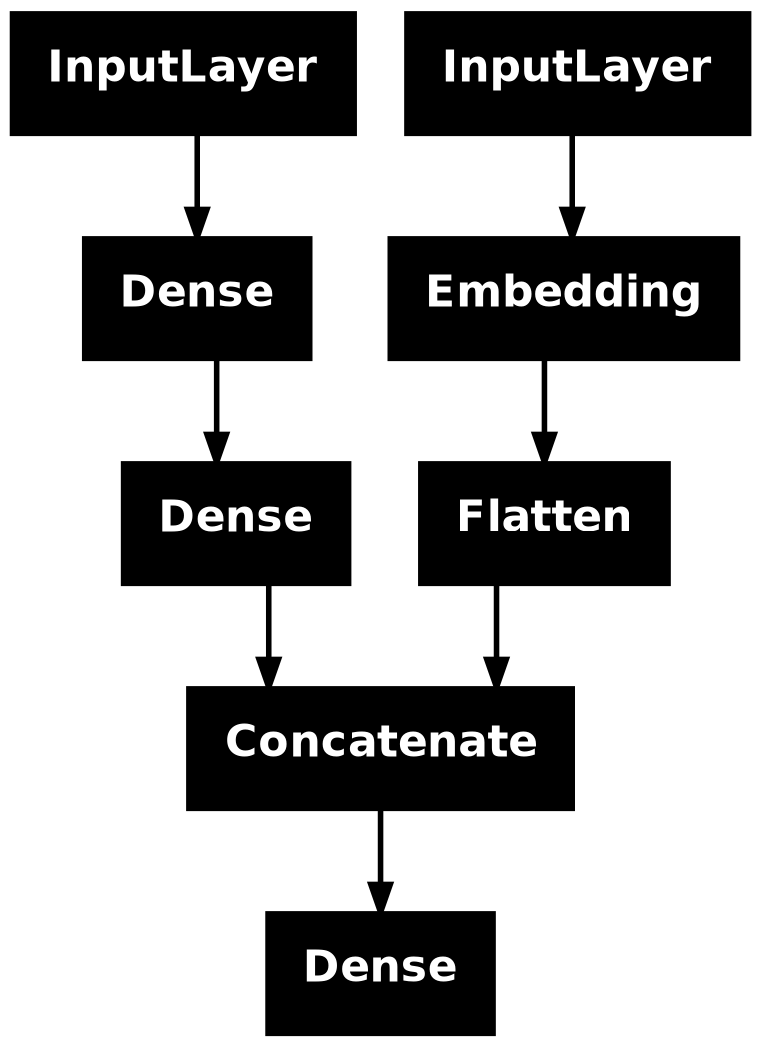

In [26]:
tf.keras.utils.plot_model(model)

In [27]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
    loss = 'mse'
)

history = model.fit(
    [X_train, addr_train],
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        ),
        tf.keras.callbacks.ReduceLROnPlateau()
    ]
)

Epoch 1/50


2025-10-02 15:14:25.583812: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 115973672 exceeds 10% of free system memory.


848/848 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - loss: 185665454080.0000 - val_loss: 139992776704.0000 - learning_rate: 0.1000
Epoch 2/50
848/848 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - loss: 106171678720.0000 - val_loss: 120596062208.0000 - learning_rate: 0.1000
Epoch 3/50
848/848 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - loss: 96512909312.0000 - val_loss: 115614875648.0000 - learning_rate: 0.1000
Epoch 4/50
848/848 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - loss: 86228475904.0000 - val_loss: 119039819776.0000 - learning_rate: 0.1000
Epoch 5/50
848/848 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - loss: 79529771008.0000 - val_loss: 122518159360.0000 - learning_rate: 0.1000
Epoch 6/50
848/848 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - loss: 74656325632.0000 - val_loss: 120886067200.0000 - learning_rate: 0.1000


### Results

In [28]:
y_true = np.array(y_test)
y_pred = np.squeeze(model.predict([X_test, addr_test]))
y_pred

455/455 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


array([1021293.2 ,  615723.2 ,  736830.06, ...,  413286.53,  867931.5 ,
        496673.47], shape=(14530,), dtype=float32)

In [29]:
model_r2 = r2_score(y_true, y_pred)

print("Model R^2 Score: {:.6f}".format(model_r2))

Model R^2 Score: 0.726287
